In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Data Collection

In [ ]:
path = r'/content/drive/MyDrive/Suicide_Records_INDIA.csv'
df = pd.read_csv(path)

# Data Analysis

In [ ]:
df.describe


<bound method NDFrame.describe of     ï»¿State  Year             Type_code  \
0    HARYANA  2011         Means_adopted   
1    HARYANA  2011         Means_adopted   
2    HARYANA  2011  Professional_Profile   
3    HARYANA  2011                Causes   
4    HARYANA  2011  Professional_Profile   
..       ...   ...                   ...   
224  HARYANA  2003                Causes   
225  HARYANA  2003                Causes   
226  HARYANA  2003                Causes   
227  HARYANA  2003                Causes   
228  HARYANA  2003                Causes   

                                         Type  Gender Age_group  
0                                  Harassment  Female     30-44  
1                          By Over Alcoholism    Male     30-44  
2                               Self employed  Female     45-59  
3                  Forcing For Honour Killing  Female     15-29  
4                       Professional Activity  Female     45-59  
..                                        ...     ...       ...  
224                    Illegitimate Pregnancy  Female      0-14  
225                    Illegitimate Pregnancy    Male      0-14  
226                   Insanity/Mental Illness    Male     15-29  
227  Not having Children(Barrenness/Impotency  Female     15-29  
228             Other Causes (Please Specity)  Female     30-44  

[229 rows x 6 columns]>

In [ ]:
df.head()

,ï»¿State,Year,Type_code,Type,Gender,Age_group
0,HARYANA,2011,Means_adopted,Harassment,Female,30-44
1,HARYANA,2011,Means_adopted,By Over Alcoholism,Male,30-44
2,HARYANA,2011,Professional_Profile,Self employed,Female,45-59
3,HARYANA,2011,Causes,Forcing For Honour Killing,Female,15-29
4,HARYANA,2011,Professional_Profile,Professional Activity,Female,45-59


In [ ]:
df.tail()

,ï»¿State,Year,Type_code,Type,Gender,Age_group
224,HARYANA,2003,Causes,Illegitimate Pregnancy,Female,0-14
225,HARYANA,2003,Causes,Illegitimate Pregnancy,Male,0-14
226,HARYANA,2003,Causes,Insanity/Mental Illness,Male,15-29
227,HARYANA,2003,Causes,Not having Children(Barrenness/Impotency,Female,15-29
228,HARYANA,2003,Causes,Other Causes (Please Specity),Female,30-44


In [ ]:
df.shape

(229, 6)

In [ ]:
df.Age_group

0      30-44
1      30-44
2      45-59
3      15-29
4      45-59
       ...  
224     0-14
225     0-14
226    15-29
227    15-29
228    30-44
Name: Age_group, Length: 229, dtype: object

# Data Cleaning

In [ ]:
df.isnull().sum()

ï»¿State     0
Year         0
Type_code    0
Type         0
Gender       0
Age_group    0
dtype: int64

In [ ]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
224    False
225    False
226    False
227    False
228    False
Length: 229, dtype: bool

In [ ]:
df.drop_duplicates()

,ï»¿State,Year,Type_code,Type,Gender,Age_group
0,HARYANA,2011,Means_adopted,Harassment,Female,30-44
1,HARYANA,2011,Means_adopted,By Over Alcoholism,Male,30-44
2,HARYANA,2011,Professional_Profile,Self employed,Female,45-59
3,HARYANA,2011,Causes,Forcing For Honour Killing,Female,15-29
4,HARYANA,2011,Professional_Profile,Professional Activity,Female,45-59
...,...,...,...,...,...,...
224,HARYANA,2003,Causes,Illegitimate Pregnancy,Female,0-14
225,HARYANA,2003,Causes,Illegitimate Pregnancy,Male,0-14
226,HARYANA,2003,Causes,Insanity/Mental Illness,Male,15-29
227,HARYANA,2003,Causes,Not having Children(Barrenness/Impotency,Female,15-29


# Data Visualization

In [ ]:
import plotly as py
from plotly import tools

import plotly.figure_factory as ff
import plotly.graph_objects as go
import plotly.express as px               #  '''Plotly express is a high-level data visualization package that allows you to create interactive plots with very little code.
                                                 #     It is built on top of Plotly Graph Objects, which provides a lower-level interface for developing custom visualizations.'''

from plotly.subplots import make_subplots
import math

In [ ]:
fig = px.bar(df, x= "Type", y="Age_group",color="Age_group",text = "Age_group",color_continuous_scale=px.colors.sequential.Viridis)

fig.update_traces( textposition='outside')
fig.update_layout(title_text='Suicide Cases')

fig.show()

In [ ]:
suicide_gender=df[["Gender"]].sum().rename_axis('Gender').reset_index()
suicide_gender=suicide_gender.rename(columns ={0:"Gender"})

suicide_gender=suicide_gender.replace({"Total Male":"Male"},regex=True)
suicide_gender=suicide_gender.replace({"Total Female":"Female"},regex=True)

In [ ]:
suicide_gender.head()

,Gender,Gender
0,Gender,FemaleMaleFemaleFemaleFemaleMaleMaleFemaleFema...


In [ ]:
df.size

1374

In [ ]:
# To know the diffarent number of unique in data
df.nunique()

ï»¿State      3
Year          7
Type_code     5
Type         65
Gender        2
Age_group     6
dtype: int64

In [ ]:
df_year=df.groupby("Year")["Year"].count()
df_year.sort_values(ascending = True)

Year
2005     2
2004    15
2011    24
2003    39
2012    39
2002    50
2001    60
Name: Year, dtype: int64

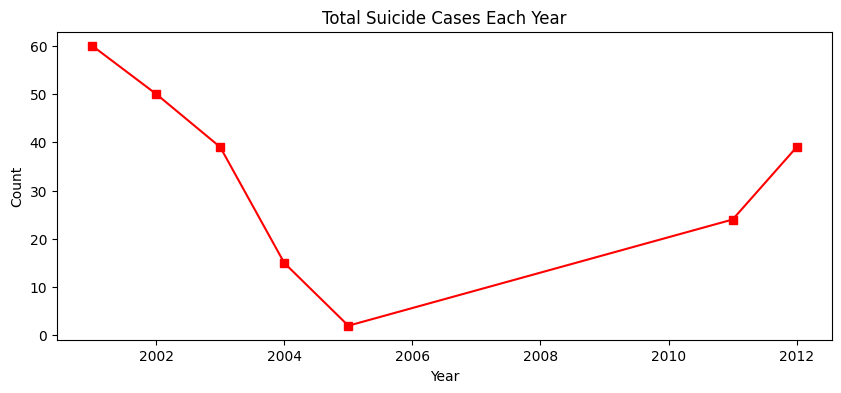

In [ ]:
# Graph#
fig, ax=plt.subplots(figsize=(10,4))
plt.plot(df_year, color="r", marker="s")

# Axis labels
ax.set_title ("Total Suicide Cases Each Year")
ax.set_xlabel ("Year")
ax.set_ylabel ("Count");

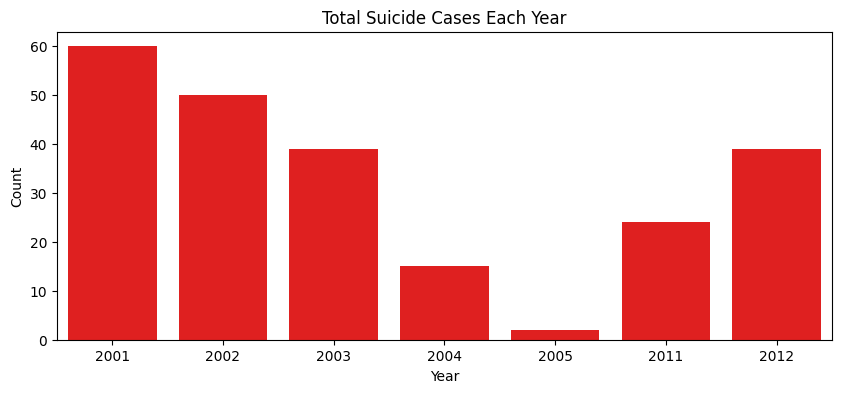

In [ ]:
fig, ax=plt.subplots(figsize=(10,4))
sns.barplot(
    x = df_year.index,
    y = df_year,
    color= "r"
)
ax.set_title ("Total Suicide Cases Each Year")
ax.set_xlabel ("Year")
ax.set_ylabel ("Count");

In [ ]:
df["Type"].nunique()

65

In [ ]:
# To know type that are most apperaring
df["Type"].value_counts().sort_values(ascending= False)


Type
Others (Please Specify)                      15
Student                                       8
Physical Abuse (Rape/Incest Etc.)             7
House Wife                                    7
Not having Children(Barrenness/Impotency      7
                                             ..
Married                                       1
Harassment                                    1
Not having Children (Barrenness/Impotency     1
By Overdose of sleeping pills                 1
Seperated                                     1
Name: count, Length: 65, dtype: int64

In [ ]:
top_ten_most_appering_type = df["Type"].value_counts().sort_values(ascending= False).head(10)
top_ten_most_appering_type

Type
Others (Please Specify)                     15
Student                                      8
Physical Abuse (Rape/Incest Etc.)            7
House Wife                                   7
Not having Children(Barrenness/Impotency     7
By Fire-Arms                                 6
Public Sector Undertaking                    6
Self-employed (Business activity)            6
Fall in Social Reputation                    6
Farming/Agriculture Activity                 5
Name: count, dtype: int64

In [ ]:
bottom_ten_least_appering_type = df["Type"].value_counts().sort_values(ascending= False).tail(10)
bottom_ten_least_appering_type

Type
Forcing For Honour Killing                   1
BlackMailing                                 1
Hr. Secondary/Intermediate/Pre-Universit     1
Service (Private)                            1
Primary                                      1
Married                                      1
Harassment                                   1
Not having Children (Barrenness/Impotency    1
By Overdose of sleeping pills                1
Seperated                                    1
Name: count, dtype: int64

In [ ]:
df_number_state_apearence = df["ï»¿State"].value_counts().sort_values(ascending= False)
df_number_state_apearence.head()

ï»¿State
HARYANA             133
HIMACHAL PRADESH     55
GUJARAT              41
Name: count, dtype: int64

In [ ]:
top_10_appearing_state = df_number_state_apearence.head(10)
top_10_appearing_state

ï»¿State
HARYANA             133
HIMACHAL PRADESH     55
GUJARAT              41
Name: count, dtype: int64

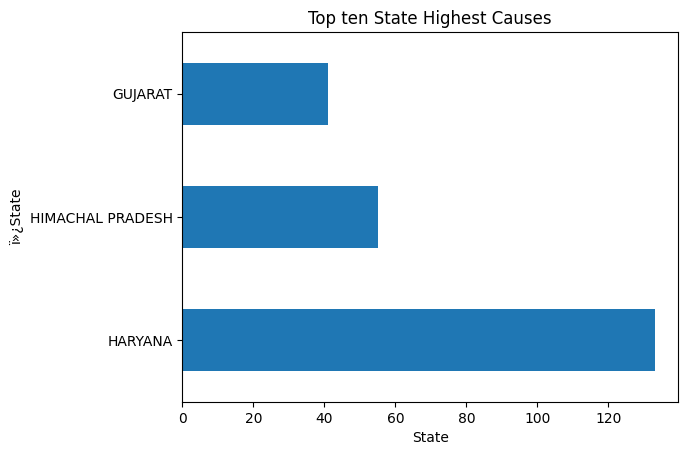

In [ ]:
top_10_appearing_state.plot(
    kind = 'barh',
    xlabel = "State",
    title = "Top ten State Highest Causes"
);

In [ ]:
bottom_10_least_apppearing_state = (df_number_state_apearence
                                    .tail(10)
                                    .sort_values(ascending=False))
bottom_10_least_apppearing_state

ï»¿State
HARYANA             133
HIMACHAL PRADESH     55
GUJARAT              41
Name: count, dtype: int64

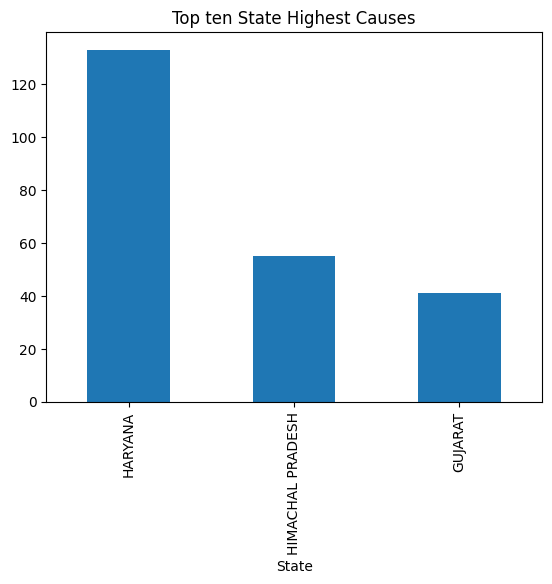

In [ ]:
bottom_10_least_apppearing_state.plot(
    kind = 'bar',
    xlabel = "State",
    title = "Top ten State Highest Causes"
);

In [ ]:
female = (df["Gender"] == "Female").sum()
female

122

In [ ]:
male = (df["Gender"] == "Male").sum()
male

107

In [ ]:
proportion_female = ((female.sum() / len(df["Gender"])) * 100).round(2)
proportion_female

53.28

In [ ]:
proportion_male = ((male.sum() / len(df["Gender"])) * 100).round(2)
proportion_male

46.72

In [ ]:
df1=df["Gender"].value_counts()
df1

Gender
Female    122
Male      107
Name: count, dtype: int64

In [ ]:
fig = px.pie(
    df,
    names = df["Gender"],
    values = df["Gender"].index
)
# fig.update_traces to label each portion with name and percentage inside
fig.update_traces(textinfo = "label+percent", insidetextfont = dict(color = "white"))

# {"itemclick":False} to ensure that when you click at the legend item will not disapear
fig.update_layout(legend = {"itemclick":False})
fig.show()

In [ ]:
df["Type_code"].nunique()

5

In [ ]:
type_code = df.groupby("Type_code")["Type_code"].count().sort_values(ascending= True)
type_code

Type_code
Social_Status             2
Education_Status          4
Means_adopted            58
Professional_Profile     63
Causes                  102
Name: Type_code, dtype: int64

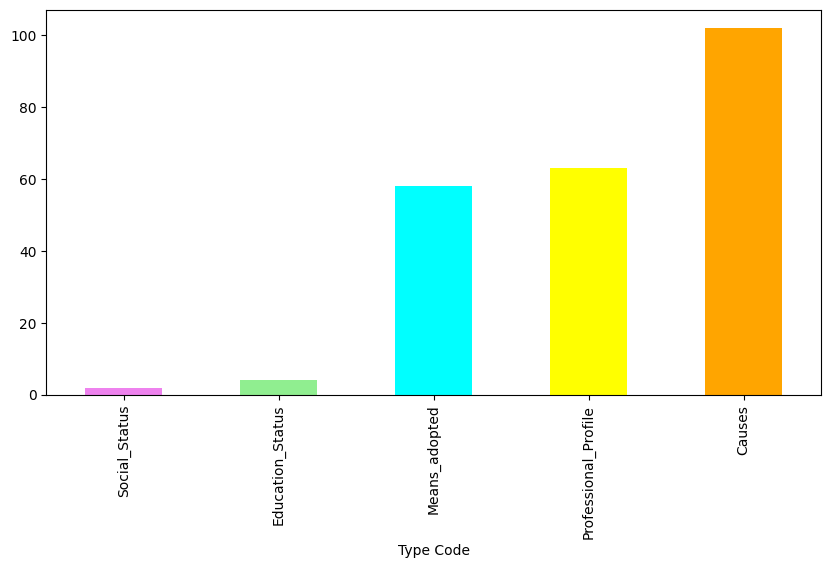

In [ ]:
# Graphs comparisson using type code
fig, (ax1) =plt.subplots(1,  figsize=(10,5))

type_code.plot(
    kind = 'bar',
    xlabel = "Type Code",
    #title = "Sucide cases by Type code",
    color=['violet', 'lightgreen','cyan',"yellow","orange"]
);



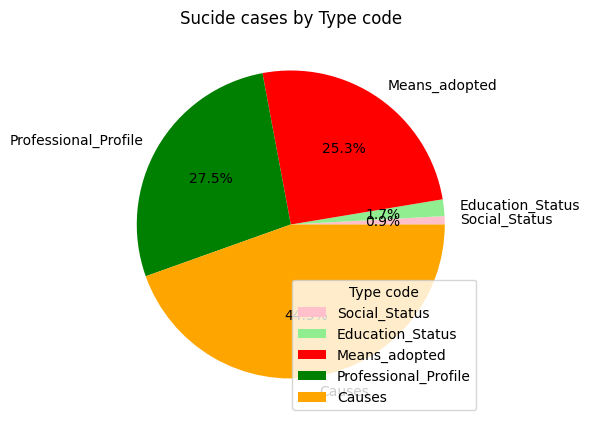

In [ ]:
fig, (ax) =plt.subplots(1,  figsize=(10,5))
ax.pie(type_code,
       labels = type_code.index, autopct='%1.1f%%', startangle=0,
       colors=['Pink', 'lightgreen','Red',"green","orange"]

)
ax.set_title ("Sucide cases by Type code");
ax.legend(title="Type code", loc= "lower right");




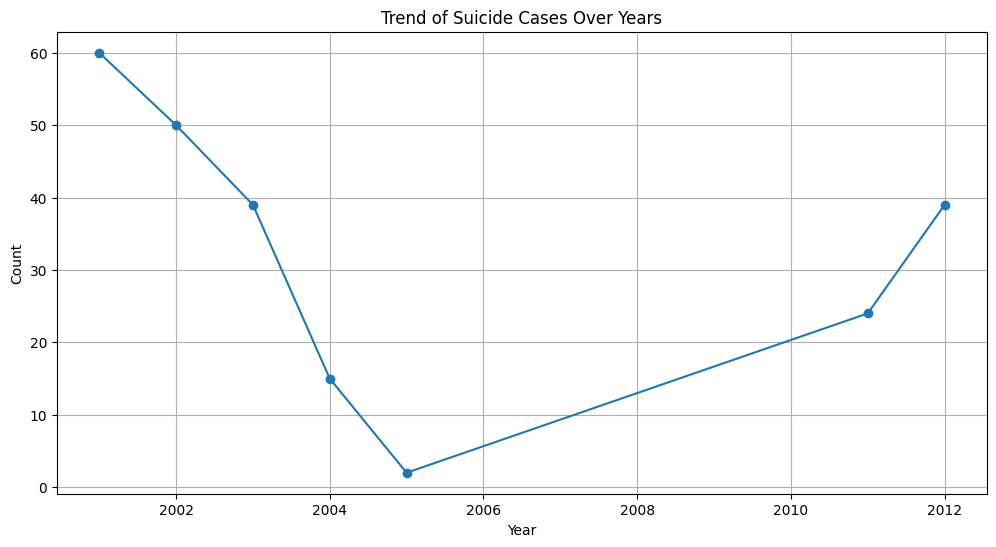

In [ ]:
# Trend of suicide cases over time
plt.figure(figsize=(12, 6))
time_series = df.groupby('Year')['Type'].count()
time_series.plot(marker='o')
plt.title("Trend of Suicide Cases Over Years")
plt.xlabel("Year")
plt.ylabel("Count")
plt.grid(True)
plt.show()

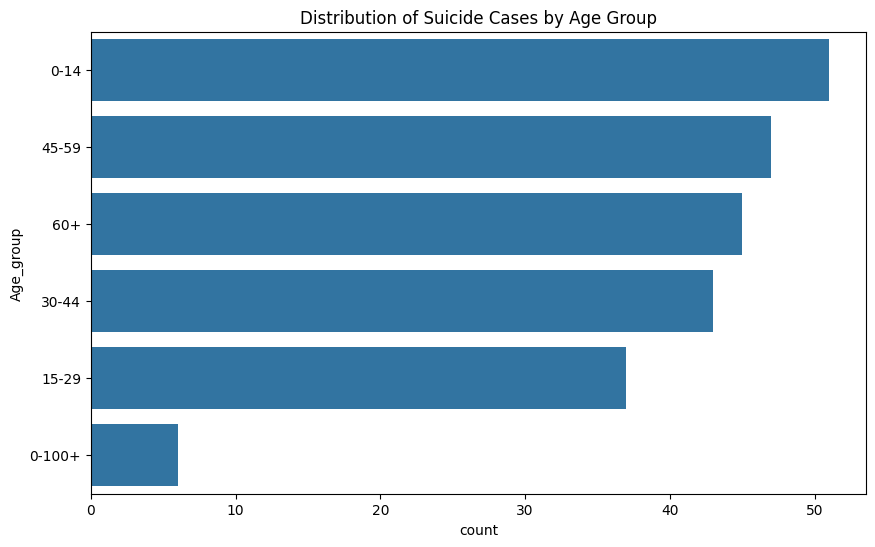

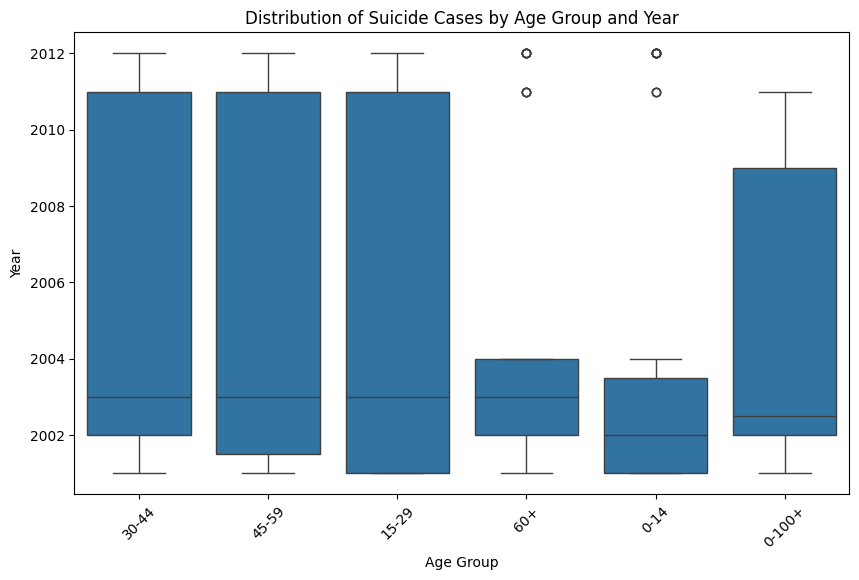

In [ ]:
# Distribution of Suicide Cases by Age Group
plt.figure(figsize=(10, 6))
sns.countplot(y='Age_group', data=df, order=df['Age_group'].value_counts().index)
plt.title('Distribution of Suicide Cases by Age Group')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Age_group', y='Year')
plt.title("Distribution of Suicide Cases by Age Group and Year")
plt.xticks(rotation=45)
plt.xlabel("Age Group")
plt.ylabel("Year")
plt.show()

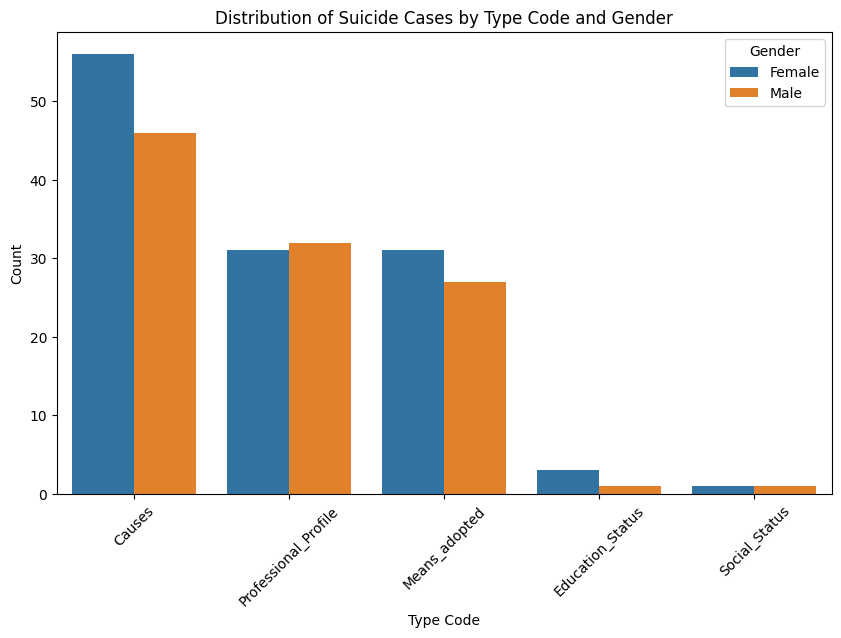

In [ ]:
# Distribution of suicide cases by 'Type_code' and 'Gender
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Type_code', hue='Gender', order=df['Type_code'].value_counts().index)
plt.title("Distribution of Suicide Cases by Type Code and Gender")
plt.xticks(rotation=45)
plt.xlabel("Type Code")
plt.ylabel("Count")
plt.legend(title="Gender")
plt.show()

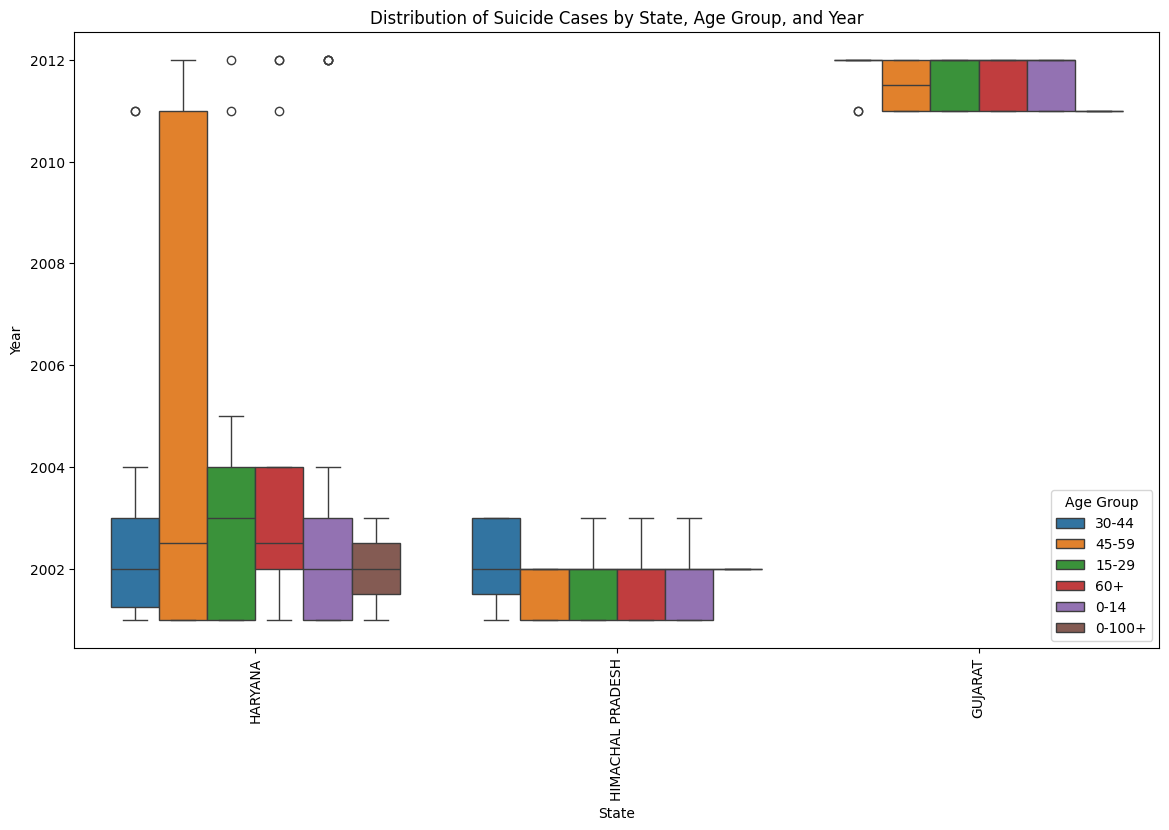

In [ ]:
# Distribution of Suicide Cases by State, Age Group, and Year
plt.figure(figsize=(14, 8))
sns.boxplot(data=df, x='ï»¿State', y='Year', hue='Age_group')
plt.title("Distribution of Suicide Cases by State, Age Group, and Year")
plt.xticks(rotation=90)
plt.xlabel("State")
plt.ylabel("Year")
plt.legend(title="Age Group")
plt.show()

In [ ]:


# Group the data and calculate the count of each combination
grouped_data = df.groupby(['Year', 'Gender', 'Age_group', 'Type']).size().reset_index(name='Count')

# Create the sunburst chart
fig = px.sunburst(grouped_data, path=['Year', 'Gender', 'Age_group', 'Type'], values='Count')
fig.update_layout(title="Sunburst Chart of Suicide Cases")
fig.show()

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [ ]:
!pip install fuzzywuzzy

In [ ]:
# Extract features using TF-IDF
# Term Frequency-Inverse Document Frequency (TF-IDF) representation
# Each string becomes a vector, and then you can apply traditional clustering algorithms like K-means or hierarchical clustering.
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from fuzzywuzzy import fuzz

# Sample string data
data = df['Type_code']

# TF-IDF Vectorization
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(data)

# K-means clustering
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)

# Print clusters
for i in range(max(kmeans.labels_)+1):
    cluster = [data[j] for j in range(len(data)) if kmeans.labels_[j] == i]
    print(f"Cluster {i + 1}: {cluster}")

Cluster 1: ['Professional_Profile', 'Professional_Profile', 'Professional_Profile', 'Professional_Profile', 'Professional_Profile', 'Professional_Profile', 'Professional_Profile', 'Professional_Profile', 'Professional_Profile', 'Professional_Profile', 'Professional_Profile', 'Professional_Profile', 'Professional_Profile', 'Professional_Profile', 'Professional_Profile', 'Professional_Profile', 'Professional_Profile', 'Professional_Profile', 'Professional_Profile', 'Professional_Profile', 'Professional_Profile', 'Professional_Profile', 'Professional_Profile', 'Professional_Profile', 'Professional_Profile', 'Professional_Profile', 'Professional_Profile', 'Professional_Profile', 'Professional_Profile', 'Professional_Profile', 'Professional_Profile', 'Professional_Profile', 'Professional_Profile', 'Professional_Profile', 'Professional_Profile', 'Professional_Profile', 'Professional_Profile', 'Professional_Profile', 'Professional_Profile', 'Professional_Profile', 'Professional_Profile', 'Pro

/usr/local/lib/python3.10/dist-packages/fuzzywuzzy/fuzz.py:11: UserWarning:

Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



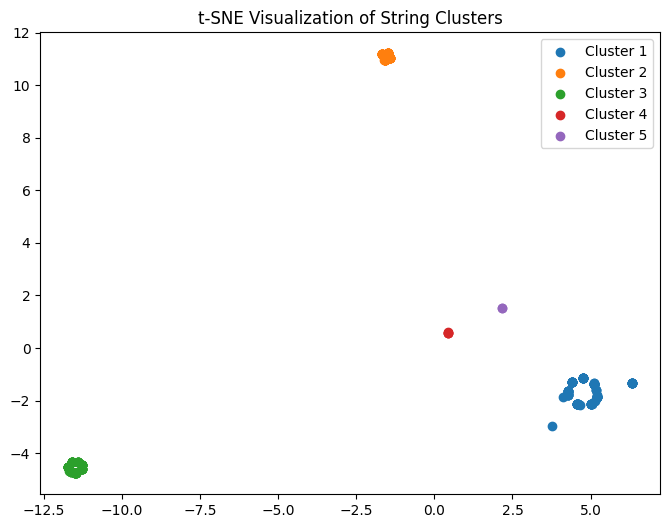

In [ ]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

# Sample string data
data =df['Type_code']

# TF-IDF Vectorization
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(data)

# K-means clustering
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)

# t-SNE for dimensionality reduction

tsne = TSNE(n_components=2, random_state=42,init = 'random')
X_tsne = tsne.fit_transform(X)

# Visualize clusters
plt.figure(figsize=(8, 6))
ninit = 'auto'
for i in range(max(kmeans.labels_)+1):
    cluster_points = X_tsne[kmeans.labels_ == i]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {i + 1}')

plt.title('t-SNE Visualization of String Clusters')

plt.legend()
plt.show()

In [ ]:
from sklearn.cluster import KMeans
import time

# Generate some example data
from sklearn.datasets import make_blobs
X, _ = make_blobs(n_samples=1374, n_features=6, centers=5, random_state=0)

# Initialize and configure the KMeans algorithm
kmeans = KMeans(n_clusters=5, init='k-means++', n_init=10, max_iter=300, random_state=0)

# Measure the execution time
start_time = time.time()
kmeans.fit(X)
end_time = time.time()

accuracy2 = end_time - start_time
print(f"accuracy time: {accuracy2} seconds")

accuracy time: 0.580582857131958 seconds


In [ ]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

In [ ]:
def convert_to_float(value):
    try:
        return float(value)
    except ValueError:
        return None  # Or any other handling you prefer for non-numeric values

# Example usage
data = ['10.5', '20', 'HARYANA', '30.7', '40']
float_values = [convert_to_float(val) for val in data]
print(float_values)


[10.5, 20.0, None, 30.7, 40.0]


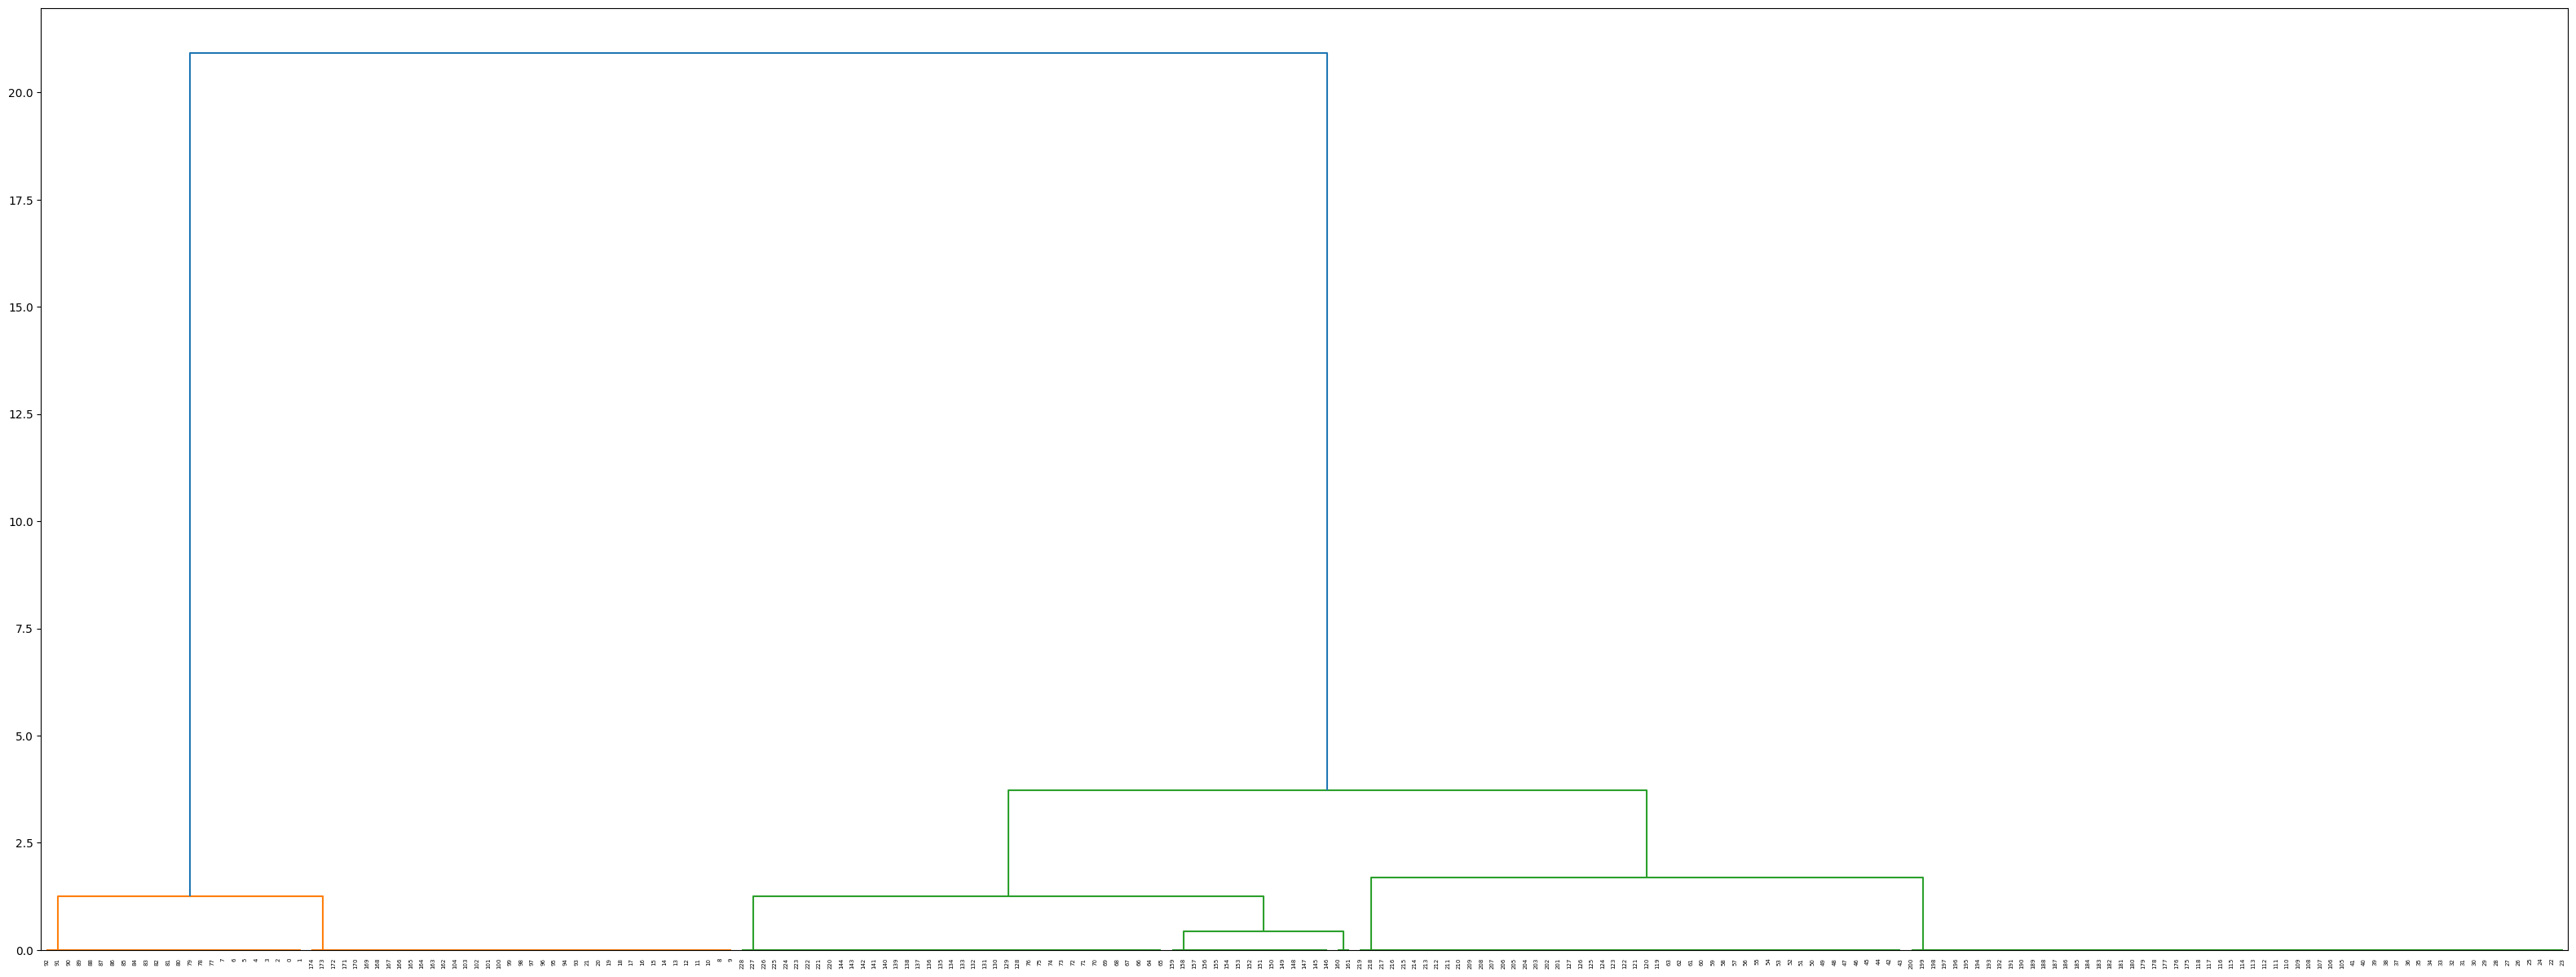

In [ ]:
# Example preprocessing steps
from sklearn.preprocessing import StandardScaler

# Assuming df contains your data, perform preprocessing
# Drop any non-numeric columns or handle them appropriately
numeric_df = df.select_dtypes(include=['number'])

# Handle missing values if any
numeric_df = numeric_df.dropna()
plt.figure(figsize=(40, 15))
# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_df)

# Perform hierarchical clustering on scaled data
# Replace df with scaled_data in the sch.linkage function
dendrogram = sch.dendrogram(sch.linkage(scaled_data, method="ward"))


In [ ]:
import numpy as np
from scipy.cluster.hierarchy import linkage, dendrogram
import time

# Create a sample dataset (replace this with your actual data)
data = np.random.rand(100, 2)

# Start measuring the execution time
start_time = time.time()

# Perform hierarchical clustering
linkage_matrix = linkage(data, method='ward')

# End measuring the execution time
end_time = time.time()

# Calculate the execution time in seconds
accuracy1 = end_time - start_time
print(f"accuracy time: {accuracy1} seconds")


accuracy time: 0.0018193721771240234 seconds
